# Modeling for simulation

Modeling is an act of building a model. A model can be any simplified representation of a real essence of a system of interest. In case of a robotic system, by mathematical model we mean a differential equation of motion. There are plenty of ways to derive a differential equation of motion. This section compares two modeling technicians for simulation: block-diagram and bond graphs. 

## Block-diagram modeling for simulation

This subsection reminds of basic concepts regarding Lagrangian derivation of the dynamics. The Lagrange’s Equations have the advantage of requiring only the kinetic and potential energies of the system to be computed, and hence tend to be less prone to error than summing together the inertial, Coriolis, centrifugal, actuator, and other forces acting on the robot’s links.

Let us consider a straightforward example of deriving an equation of motion for a mass-spring-damper system depicted in Figure below. We will use a Lagrangian analysis for our derivation, which relies on the energy properties of mechanical systems to compute the equations of motion.

Mass-spring-damper system consists of a single body with mass $m$ connected to a fixed frame via spring with stiffness $k$ and a damper with viscosity $b$. A body with mass $m$ is described by one generalized coordinate $x$ since the system is one-dimensional. 

![image.png](images/pic_1.png)

Differential equation above is the <i>model</i> of a system of interest. While the derived model is represented in a symbolic representation, we can not say much about the system's behavior and performance. However, the derived model can be used to create a <i>simulation</i> model.

Figure above shows a block-diagram of the derived model  that can be implemented in simulators, e.g., Simulink in MATLAB. The block diagram is looped. Let us start the explanation from the summer that gives as the total force $F$. The total force $F$ is multiplied by a gain with coefficient $1/m$ that gives us $\ddot{x}$, according to the Newton’s second law. Then the integration of acceleration  $\ddot{x}$ gives us velocity  $\dot{x}$, and the integration once again gives us displacement $x$. Multiplication of displacement $x$ with coefficient of stiffness $k$ and  multiplication of velocity $\dot{x}$ with coefficient of damping $b$ gives us spring force and damper force respectively. Summation of spring, damper, and gravity forces returns the total force $F$.  

Classical block-diagram modeling procedure begins from creation of a mathematical model of the components of a system of interest and their interconnection, and only then a block-diagram can be built from the assembled model, which serves as a basis for simulation, e.g., in Simulink. The approach is straightforward for a simple cases such that one-dimension systems, but it becomes tedious for complex systems. 

To make the simulation easier, there are alternatives techniques. One of them, which is called <i>bond graph</i>, uses the opposite approach: modeling of subsystems and their mutual relations in a way of a directed graph. Therefore, creating a graphical representation first, which subsequently derives mathematical model. 

## Modeling

To write the equations of motion, we begin by deriving the Lagrangian for the system, $\mathcal{L}$, as the difference between the kinetic and potential energy of the system
$$ \mathcal{L}(x,\dot{x}) = { \mathcal{K}}(x,\dot{x}) - { \mathcal{P}}(x) = \frac{1}{2} m\dot{x}^2 -  ( mgx+ \frac{1}{2}kx^2),$$
where $\mathcal{K}(x,\dot{x})$ is the kinetic energy of the body and $\mathcal{V}(x)$ is the potential energy of the body and the spring, both written in generalized coordinates, $g \approx 9.8 m/sec^2$ is the gravitational constant.

The Lagrange’s equations of motion for a mechanical system with generalized coordinates $x \in \mathbb{R}^m$ and Lagrangian $\mathcal{L}$ are given by 
$$\frac{d}{dt}\Big(\frac{\partial \mathcal{L}}{\partial \dot{x}}\Big) - \frac{\partial \mathcal{L}}{\partial {x}} = Q,$$
where $Q$ is the external force acting on a system, which is a damping force in our case $Q = - b\dot{x}$.

%	Substituting  $\mathcal{L}$ into Lagrange’s equations gives
The partial derivative of $\mathcal{L}$ in respect to $x$
$$\frac{\partial \mathcal{L}}{\partial x} =- mg-kx,$$
the partial derivative of $\mathcal{L}$ in respect to $\dot{x}$
$$\frac{\partial L}{\partial \dot{x}} = m\dot{x},$$
the full time derivative 
$$\frac{d}{dt}\Big(\frac{\partial L}{\partial \dot{x}}\Big) = m\ddot{x}.$$

Finally, the equations of motion for a mass-spring-damper system 
$$ m\ddot{x} + mg + kx = - b\dot{x},$$
or it can be rewritten in the next form
$$ 
	F = - b\dot{x} - kx - mg,
$$
where according the Newton’s second law $F = m\ddot{x}$. 

## Continuous-Time Dynamics

In general form for a smooth system:
```math
\dot{x} = f(x, u)
```
where:
- $f$ is "dynamics"
- $x = [q; v]$ is a state vector, $x \in \mathbb{R}^n$
- $u$ is a control vector or input, $u \in \mathbb{R}^m$

## Control-Affine Systems
Most of robotics systems can be put in affine form:

```math
\dot{x} = f_0(x) + B(x)u 
```    
where:
- $f_0(x)$ is called "drift"
- $B(x)$ is called "input Jacobian"

## Discrete-Time Dynamics

Explicit form:
$$ x_{n+1} = f_d(x_n, u_n)$$
Forward Euler integration method
```math
x_{k+1} = x_k + hf(x_{k})
```

Backward Euler integration method is <i>implicit</i> method:
```math
x_{k+1} = x_k + hf(x_{k+1})
```
where $f(x_{k+1})$ means a calculation of dynamics $f$ at future time

Write as: 
```math
f_d(x_{k+1}, x_k, u_k) = x_k + hf(x_{k+1}) - x_{k+1} = 0
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mass_spring_system(state:list):

    x, dx = state
    b = 0.5
    m = 1 
    g = 9.8
    k = 20
    ddx = - 1/m * (b*dx + m*g + k*x)
    return np.array([dx, ddx])

def pendulum_bckw_euler(fun:object, x0:np.ndarray, t_f:float, h:float) -> tuple:
 
    t = np.arange(0, t_f+h, h)

    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t)-1):
        e = 1 # an initial error value
        x_hist[:, k+1] = x_hist[:, k] 
        while e > 1e-8:
            x_n = x_hist[:, k] + h*fun(x_hist[:, k+1])
            e = np.linalg.norm(x_n - x_hist[:,k+1]) # an error value
            x_hist[:, k+1] = x_n
 
    return x_hist, t

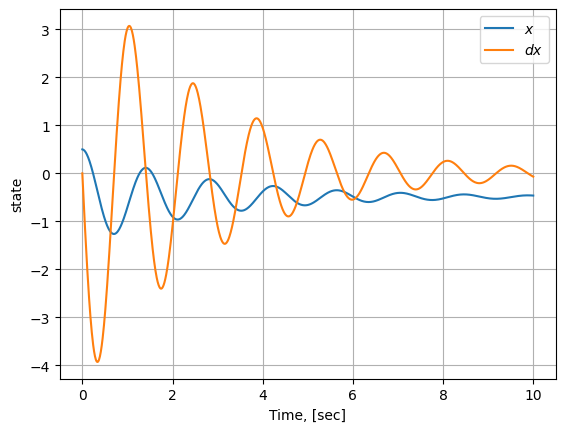

In [3]:
x0 = np.array([0.5, 0])
x_hist3, t_hist3 = pendulum_bckw_euler(mass_spring_system, x0, 10, .01)
plt.plot(t_hist3, x_hist3[0,:], label="$x$")
plt.plot(t_hist3, x_hist3[1,:], label="$dx$")
plt.xlabel('Time, [sec]')
plt.ylabel('state')
plt.legend()
plt.grid()